# Residual Analysis Notebook
**Creator/Author:** Elisa Warner  
**Date of last update:** 3/3/2023  
**Description:** I ran multiple statistical tests and created different graphics here. Please use this notebook as some ideas of what you might want to do with the data but do NOT try to run from start to finish. it is very likely you won't have all the data to do that 
(some of the code reqires clinical data).
**Questions? Contact:** elisawa@umich.edu

# Run Naive Bayes

Note: 0 is missing, 1 is negative, 2 is positive

In [1]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from tqdm.notebook import tqdm
import numpy as np
from glob import glob

In [ ]:
root = "Z:"
allFiles = glob(root + "/.../1Pseudoprogression/UPenn-UMich Code Sharing/Data_Full42_2023/*/*.RData")
allFiles

In [3]:
resd = {}
names = {}

for f in allFiles:
    resd[f] = pyreadr.read_r(f)['den']
    resd[f] = resd[f][list(resd[f])[::2]]

In [4]:
# test: remove all -2s 
ridx = [x for x in resd[f].index.values if x[-1] != "2"]

for f in allFiles:
    resd[f] = resd[f].loc[ridx]

In [5]:
eighty = np.quantile(resd[f].std(),.80)

400
0.4011035638262303


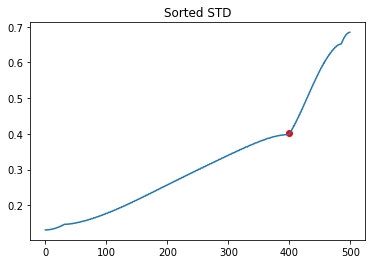

In [6]:
shift = 0
x = [x for x in sorted(resd[f].std())]

x_idx = np.where(np.array(x) > eighty)[0][0]
print(x_idx)

x = x[shift:]
x_idx = x_idx - shift
plt.plot(range(shift, len(x) + shift),x)
plt.scatter(shift + x_idx, x[x_idx], c="red")
plt.title("Sorted STD")
print(x[x_idx])

In [7]:
## Load clinical

In [8]:
clinicalx = pd.read_csv("../clinical.csv")

In [9]:
list(clinicalx)

['ID',
 'Sex',
 'Age',
 'Psuedo',
 'IDH1_status',
 'status_1p19q',
 'EGFR_status',
 'P53_status']

In [10]:
clinical = pd.DataFrame()

for patid in resd[f].index.values:
    sub = clinicalx[clinicalx['ID'] == patid]
    clinical = clinical.append(sub)

In [11]:
clinical = clinical.rename(index=dict(zip(list(clinical.index.values), list(clinical['ID']))))
clinical = clinical.replace({'M':0, 'F':1})    

In [12]:
clinical

,ID,Sex,Age,Psuedo,IDH1_status,status_1p19q,EGFR_status,P53_status
1-1,1-1,0,31,0,0,0,2,1
11-1,11-1,0,51,1,2,2,2,1
12-1,12-1,0,62,0,2,0,0,1
13-1,13-1,1,59,0,1,0,2,2
14-1,14-1,0,38,0,2,2,0,1
15-1,15-1,1,67,0,1,0,2,2
16-1,16-1,1,70,0,1,0,2,2
17-1,17-1,0,31,1,1,0,0,0
18-1,18-1,0,65,0,1,2,0,0
19-1,19-1,1,35,0,0,1,0,0


In [13]:
sub0 = clinical[clinical['Psuedo'] == 0]
sub1 = clinical[clinical['Psuedo'] == 1]
means0 = sub0.mean().round(3)
means1 = sub1.mean().round(3)

pvals = []
cols = list(clinical)[1:]

for i in range(len(cols)):
    col = cols[i]
    pvals.append(np.round(ttest_ind(sub0[col],sub1[col])[1],3))

/tmp/ipykernel_457169/3166185282.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means0 = sub0.mean().round(3)
/tmp/ipykernel_457169/3166185282.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means1 = sub1.mean().round(3)


In [14]:
print("TP:", sub0.shape[0], "PsP:", sub1.shape[0])
print("Male TP:", sub0[sub0["Sex"] == 0].shape[0]) # Male = 0
print("Female TP:", sub0[sub0["Sex"] == 1].shape[0]) # Female = 1
print("Male PsP:", sub1[sub1["Sex"] == 0].shape[0]) # Male = 0
print("Female PsP:", sub1[sub1["Sex"] == 1].shape[0]) # Female = 1
print(np.round(ttest_ind(sub0["Sex"],sub1["Sex"])[1],3))

TP: 29 PsP: 13
Male TP: 17
Female TP: 12
Male PsP: 9
Female PsP: 4
0.524


In [15]:
print("TP:", sub0.shape[0], "PsP:", sub1.shape[0])
print("wildtype TP:", sub0[sub0["IDH1_status"] == 1].shape[0]) # Male = 0
print("mutant TP:", sub0[sub0["IDH1_status"] == 2].shape[0]) # Female = 1
print("missing TP:", sub0[sub0["IDH1_status"] == 0].shape[0]) # Female = 1

print("wildtype PsP:", sub1[sub1["IDH1_status"] == 1].shape[0]) # Male = 0
print("mutant PsP:", sub1[sub1["IDH1_status"] == 2].shape[0]) # Female = 1
print("missing PsP:", sub1[sub1["IDH1_status"] == 0].shape[0]) # Female = 1
print(np.round(ttest_ind(sub0["IDH1_status"][sub0["IDH1_status"] > 0],sub1["IDH1_status"][sub1["IDH1_status"].astype('int') > 0])[1],3))

TP: 29 PsP: 13
wildtype TP: 14
mutant TP: 8
missing TP: 7
wildtype PsP: 6
mutant PsP: 5
missing PsP: 2
0.627


In [16]:
print("TP:", sub0.shape[0], "PsP:", sub1.shape[0])
print("wildtype TP:", sub0[sub0["status_1p19q"] == 1].shape[0]) # Male = 0
print("mutant TP:", sub0[sub0["status_1p19q"] == 2].shape[0]) # Female = 1
print("missing TP:", sub0[sub0["status_1p19q"] == 0].shape[0]) # Female = 1

print("wildtype PsP:", sub1[sub1["status_1p19q"] == 1].shape[0]) # Male = 0
print("mutant PsP:", sub1[sub1["status_1p19q"] == 2].shape[0]) # Female = 1
print("missing PsP:", sub1[sub1["status_1p19q"] == 0].shape[0]) # Female = 1
print(np.round(ttest_ind(sub0["status_1p19q"][sub0["status_1p19q"] > 0],sub1["status_1p19q"][sub1["status_1p19q"].astype('int') > 0])[1],3))

TP: 29 PsP: 13
wildtype TP: 3
mutant TP: 4
missing TP: 22
wildtype PsP: 0
mutant PsP: 3
missing PsP: 10
0.217


In [17]:
sub0["EGFR_status"][sub0["EGFR_status"] > 0]

1-1     2
13-1    2
15-1    2
16-1    2
44-1    2
Name: EGFR_status, dtype: int64

In [18]:
print("TP:", sub0.shape[0], "PsP:", sub1.shape[0])
print("wildtype TP:", sub0[sub0["EGFR_status"] == 1].shape[0]) # Male = 0
print("mutant TP:", sub0[sub0["EGFR_status"] == 2].shape[0]) # Female = 1
print("missing TP:", sub0[sub0["EGFR_status"] == 0].shape[0]) # Female = 1

print("wildtype PsP:", sub1[sub1["EGFR_status"] == 1].shape[0]) # Male = 0
print("mutant PsP:", sub1[sub1["EGFR_status"] == 2].shape[0]) # Female = 1
print("missing PsP:", sub1[sub1["EGFR_status"] == 0].shape[0]) # Female = 1
print(np.round(ttest_ind(sub0["EGFR_status"][sub0["EGFR_status"] > 0],sub1["EGFR_status"][sub1["EGFR_status"].astype('int') > 0])[1],3))

TP: 29 PsP: 13
wildtype TP: 0
mutant TP: 5
missing TP: 24
wildtype PsP: 0
mutant PsP: 4
missing PsP: 9
nan


In [19]:
print("TP:", sub0.shape[0], "PsP:", sub1.shape[0])
print("wildtype TP:", sub0[sub0["P53_status"] == 1].shape[0]) # Male = 0
print("mutant TP:", sub0[sub0["P53_status"] == 2].shape[0]) # Female = 1
print("missing TP:", sub0[sub0["P53_status"] == 0].shape[0]) # Female = 1

print("wildtype PsP:", sub1[sub1["P53_status"] == 1].shape[0]) # Male = 0
print("mutant PsP:", sub1[sub1["P53_status"] == 2].shape[0]) # Female = 1
print("missing PsP:", sub1[sub1["P53_status"] == 0].shape[0]) # Female = 1
print(np.round(ttest_ind(sub0["P53_status"][sub0["P53_status"] > 0],sub1["P53_status"][sub1["P53_status"].astype('int') > 0])[1],3))

TP: 29 PsP: 13
wildtype TP: 5
mutant TP: 12
missing TP: 12
wildtype PsP: 4
mutant PsP: 6
missing PsP: 3
0.59


In [20]:
df = pd.DataFrame([means0.values,means1.values,pvals], columns = list(clinical)[1:])
df.index = ["True Progression", "Psuedoprogression","p-val"]
df = df.drop('Psuedo', axis=1)
df.transpose()

,True Progression,Psuedoprogression,p-val
Sex,0.414,0.308,0.524
Age,53.345,45.692,0.100
IDH1_status,1.034,1.231,0.425
status_1p19q,0.379,0.462,0.752
EGFR_status,0.345,0.615,0.335
P53_status,1.000,1.231,0.446


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
pats = np.random.choice(resd[f].index.values, 9, replace=False)

In [23]:
%matplotlib inline

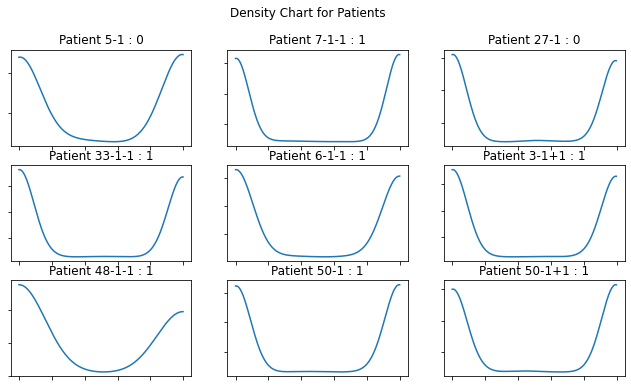

In [24]:
rows = 3
fig,ax = plt.subplots(rows, int(len(pats) / rows), figsize=(11,(2*rows)))

row_idx = -1
col_idx = 0
for x in range(len(pats)):
    if x % 3 == 0:
        row_idx += 1
    if col_idx % 3 == 0:
        col_idx = 0
    
    if pats[x].count("-") == 2 or pats[x].count("+") == 1:
        patName = pats[x][:-2]
    else:
        patName = pats[x]
    
    ax[row_idx,col_idx].plot(resd[f].loc[pats[x]])
    ax[row_idx,col_idx].set_title("Patient %s : %s" % (pats[x], clinical.loc[patName]['Psuedo']))
    ax[row_idx,col_idx].set_yticklabels([])
    ax[row_idx,col_idx].set_xticklabels([])
    
    col_idx += 1

plt.suptitle('Density Chart for Patients')
plt.savefig("Fig1.png")

/nfs/turbo/umms-ukarvind/elisawa/1Pseudoprogression/UPenn-UMich Code Sharing/Data_Full42_2023/t1post_t1postpre/resd_t1post_t1postpre.RData


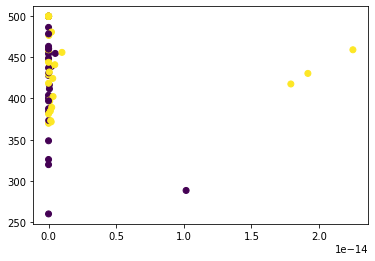

In [25]:
## create a labels dataframe
labels = pd.DataFrame()
f = list(resd.keys())[0]
print(f)

labelList = []
for patID in resd[f].index.values:
    if patID.count("-") == 2 or "+" in patID:
        patName = patID[:-2]
    else:
        patName = patID
    
    labelList.append(clinical.loc[patName]['Psuedo'])

labels['label'] = labelList
labels.index = resd[f].index.values

plt.scatter(resd[f][0], resd[f][500], c=labels['label'])

## LOOCV

In [26]:
from sklearn.metrics import roc_auc_score, recall_score

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNet

In [28]:
# the clinical features that will be included
includedFeats = [x for x in list(clinical) if x != "ID" and "Psuedo" not in x]

## Calculate results

Here, I'm redoing the calculation of importance because I need std cutoffs to be done for each fold for each criteria so the test data is not included as part of the calculations. Then, for all criteria and all folds, I will calculate the importance

We attempt to create an ensemble model to predict based off of density features.  In order to drop out density features which have not changed, we build a small ensemble model which cuts out features up to less than 1 pixel std. So we deem differences in 1 pixel to be possibly important

In [29]:
## create a labels dataframe
labels = pd.DataFrame()

labelList = []
for patID in resd[f].index.values:
    if patID.count("-") == 2 or "+" in patID:
        patName = patID[:-2]
    else:
        patName = patID
    
    labelList.append(clinical.loc[patName]['Psuedo'])

labels['label'] = labelList
labels.index = resd[f].index.values

In [30]:
print("TP patients:", np.sum(labels['label'] == 0))

TP patients: 29


In [31]:
coef = {}
idx_dict = {}
prediction_saved = {}
finalSaved = {}
sensitivity_saved = {}
specificity_saved = {}

indiv_TOGGLE = True

if indiv_TOGGLE:
    print("Choosing all masks")
else:
    print("Choosing biggest mask")

for f in resd:
    pair = f.split("/")[-1]
    predicted = np.zeros((1, clinical.shape[0])) # 100 rows, patno cols
    prediction_saved[pair] = []

    #X2 = pd.merge(resd,clinical[includedFeats],left_index=True,right_index=True)
    
    print(f.split("/")[-1], end= "...")
    for i,patno in enumerate(clinical.index.values):
        idx = [x for x in range(resd[f].shape[0]) if resd[f].index.values[x][:-2] == patno or resd[f].index.values[x] == patno]
        
        X_test1 = resd[f].iloc[idx]
        y_test = labels.iloc[idx]['label']
        
        if not indiv_TOGGLE:
            if len(idx) > 1:
                X_test1 = X_test1.loc[patno]
                y_test = y_test[0]
                #print(patno)
    
        X_train1 = resd[f].drop(resd[f].index.values[idx])
        y_train = labels.drop(resd[f].index.values[idx])['label']
    
        sorted_std = np.argsort(np.std(X_train1, axis=0).values)[::-1]
        #a = np.mean(X_train1[y_train == 0])
        #b = np.mean(X_train1[y_train == 1])
        #sorted_std = np.argsort(np.abs(a-b)).values[::-1]
        
        temp = [sorted_std[0]]
        for x in sorted_std:
            if np.sum([np.abs(x - g) < 10 for g in temp]) == 0:
                temp.append(x)
        sorted_std = temp[:3]
        #print(sorted_std)
            
        idx_ft = [list(X_train1)[x] for x in sorted_std]
        
        X_train = X_train1[idx_ft]
        X_test = X_test1[idx_ft]
        
        if pair not in idx_dict:
            idx_dict[pair] = {}
        idx_dict[pair][i] = idx_ft
    
        clf = LogisticRegression(max_iter=10000, class_weight="balanced") # 3000
        #clf = SVC(probability=True, gamma='auto', C=0.3)

        clf.fit(X_train, y_train)
        
        if not indiv_TOGGLE:
            results = list(clf.predict_proba(X_test.values.reshape(1,-1)).astype('float64')[:,1]) # sometimes reshape not needed
        else:
            results = list(clf.predict_proba(X_test.values)[:,1])
        
        if len(results) > 1:
            results = list(results)
        #    results = list([results[np.argmin(np.abs(np.round(np.array(results)) - np.array(results)))]])

        prediction_saved[pair] = prediction_saved[pair] + results

        
        if pair not in coef:
            coef[pair] = {}
        coef[pair][i] = clf.coef_
    
    if indiv_TOGGLE:
        score = roc_auc_score(labels, prediction_saved[pair])
        sensitivity_saved[pair] = recall_score(labels, np.round(prediction_saved[pair]), pos_label=1)
        specificity_saved[pair] = recall_score(labels, np.round(prediction_saved[pair]), pos_label=0)
    else:
        score = roc_auc_score(clinical['Psuedo'], prediction_saved[pair])
        sensitivity_saved[pair] = recall_score(clinical['Psuedo'], prediction_saved[pair], pos_label=1)
        specificity_saved[pair] = recall_score(clinical['Psuedo'], prediction_saved[pair], pos_label=0)
        
    finalSaved[pair] = score
    print(score)

Choosing all masks
resd_t1post_t1postpre.RData...0.5083996463306808
resd_t2_flair.RData...0.39168877099911587
resd_adc_t1postpre.RData...0.6259946949602122
resd_t1postpre_flair.RData...0.5968169761273209
resd_t1post_flair.RData...0.5888594164456233
resd_adc_t1post.RData...0.6251105216622458
resd_t1_t1post.RData...0.4907161803713528
resd_t1_t1postpre.RData...0.48983200707338637
resd_t1postpre_t2.RData...0.6180371352785144
resd_adc_t1.RData...0.6242263483642794
resd_t1_flair.RData...0.5119363395225465
resd_t1_t2.RData...0.45977011494252873
resd_adc_flair_200.RData...0.3828470380194518
resd_adc_flair.RData...0.6684350132625996
resd_t1post_t2.RData...0.614500442086649
resd_adc_t2.RData...0.6525198938992042


In [32]:
df = pd.DataFrame()

listResd = ['resd_t1postpre_flair.RData', 'resd_t1postpre_t2.RData', 'resd_t1post_flair.RData', 'resd_t1post_t1postpre.RData', 
 'resd_t1post_t2.RData', 'resd_t1_flair.RData', 'resd_t1_t1post.RData', 'resd_t1_t1postpre.RData', 'resd_t1_t2.RData', 
 'resd_t2_flair.RData', 'resd_adc_flair.RData', 'resd_adc_t1post.RData', 'resd_adc_t1postpre.RData', 'resd_adc_t2.RData', 'resd_adc_t1.RData']

for x in listResd:
    print(x, '...', finalSaved[x], sensitivity_saved[x], specificity_saved[x])

df['pair'] = listResd
df['AUC'] = [np.round(finalSaved[x],4) for x in listResd]
df['Sensitivity'] = [np.round(sensitivity_saved[x],4) for x in listResd]
df['Specificity'] = [np.round(specificity_saved[x],4) for x in listResd]

df.to_csv("../Data_Full42_2023/Assessment1_Results.csv", index=False)

resd_t1postpre_flair.RData ... 0.5968169761273209 0.6923076923076923 0.4482758620689655
resd_t1postpre_t2.RData ... 0.6180371352785144 0.6923076923076923 0.4827586206896552
resd_t1post_flair.RData ... 0.5888594164456233 0.6410256410256411 0.4482758620689655
resd_t1post_t1postpre.RData ... 0.5083996463306808 0.5641025641025641 0.4482758620689655
resd_t1post_t2.RData ... 0.614500442086649 0.6923076923076923 0.4827586206896552
resd_t1_flair.RData ... 0.5119363395225465 0.46153846153846156 0.6896551724137931
resd_t1_t1post.RData ... 0.4907161803713528 0.46153846153846156 0.5862068965517241
resd_t1_t1postpre.RData ... 0.48983200707338637 0.46153846153846156 0.5862068965517241
resd_t1_t2.RData ... 0.45977011494252873 0.41025641025641024 0.5862068965517241
resd_t2_flair.RData ... 0.39168877099911587 0.1282051282051282 0.5862068965517241
resd_adc_flair.RData ... 0.6684350132625996 0.6153846153846154 0.6551724137931034
resd_adc_t1post.RData ... 0.6251105216622458 0.5384615384615384 0.5517241379

## Naive Bayes

In [33]:
keys = list(finalSaved.keys())
values = list(finalSaved.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index if values[i] > 0.5}
keys = list(sorted_dict.keys())[::-1]
#keys = np.random.choice(keys, 10, replace = False)

In [34]:
keys

['resd_adc_flair.RData',
 'resd_adc_t2.RData',
 'resd_adc_t1postpre.RData',
 'resd_adc_t1post.RData',
 'resd_adc_t1.RData',
 'resd_t1postpre_t2.RData',
 'resd_t1post_t2.RData',
 'resd_t1postpre_flair.RData',
 'resd_t1post_flair.RData',
 'resd_t1_flair.RData',
 'resd_t1post_t1postpre.RData']

In [35]:
df

,pair,AUC,Sensitivity,Specificity
0,resd_t1postpre_flair.RData,0.5968,0.6923,0.4483
1,resd_t1postpre_t2.RData,0.6180,0.6923,0.4828
2,resd_t1post_flair.RData,0.5889,0.6410,0.4483
3,resd_t1post_t1postpre.RData,0.5084,0.5641,0.4483
4,resd_t1post_t2.RData,0.6145,0.6923,0.4828
5,resd_t1_flair.RData,0.5119,0.4615,0.6897
6,resd_t1_t1post.RData,0.4907,0.4615,0.5862
7,resd_t1_t1postpre.RData,0.4898,0.4615,0.5862
8,resd_t1_t2.RData,0.4598,0.4103,0.5862
9,resd_t2_flair.RData,0.3917,0.1282,0.5862


In [36]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import scipy.stats as st
 
naiveBayesSaved = pd.DataFrame()
naiveBayesSaved = naiveBayesSaved.append(pd.DataFrame({"AUC":df[df['pair'] == keys[0]]['AUC'].values, "Sensitivity":df[df['pair'] == keys[0]]['Sensitivity'].values, 
                                     "Specificity":df[df['pair'] == keys[0]]['Specificity'].values}, index=[1]))

for m in range(2,len(keys)+1):
    predicted_new = []
    
    pred = pd.DataFrame(prediction_saved).round().astype('int')
    pred.index = labels.index.values
    pred = pred[keys[:m]]
    
    for i,patno in enumerate(clinical.index.values):

        idx = [x for x in range(pred.shape[0]) if pred.index.values[x][:-2] == patno or pred.index.values[x] == patno]
    
        X_test1 = pred.iloc[idx]
        #X_test2 = clinical[includedFeats].loc[patno]
        y_test = labels.iloc[idx]['label']
    
        X_train1 = pred.drop(pred.index.values[idx])
        #X_train2 = clinical[includedFeats].drop(patno)
        y_train = labels.drop(pred.index.values[idx])['label']
    
        #Fitting the data to the classifier
        naive_bayes = GaussianNB() # RandomForestClassifier()
        naive_bayes.fit(X_train1, y_train)
 
        #Predict on test data
        y_predicted = naive_bayes.predict(X_test1)
        if len(y_predicted) > 1:
            y_predicted = list([st.mode(y_predicted)[0][0]])

        
        predicted_new = predicted_new + list(y_predicted)
        
    #print("%s modality pairs:" % m,roc_auc_score(labels,predicted_new))
    auc = roc_auc_score(clinical['Psuedo'], predicted_new)
    sens = recall_score(clinical['Psuedo'], predicted_new, pos_label=1)
    spec = recall_score(clinical['Psuedo'], predicted_new, pos_label=0)
    
    print("%s modality pairs:" % m, auc, sens, spec)
    
    naiveBayesSaved = naiveBayesSaved.append(pd.DataFrame({"AUC":[auc], "Sensitivity":[sens], "Specificity":[spec]}, index=[m]))

2 modality pairs: 0.656498673740053 0.6923076923076923 0.6206896551724138
3 modality pairs: 0.656498673740053 0.6923076923076923 0.6206896551724138
4 modality pairs: 0.656498673740053 0.6923076923076923 0.6206896551724138
5 modality pairs: 0.6737400530503979 0.6923076923076923 0.6551724137931034
6 modality pairs: 0.656498673740053 0.6923076923076923 0.6206896551724138
7 modality pairs: 0.6392572944297082 0.6923076923076923 0.5862068965517241
8 modality pairs: 0.5623342175066313 0.5384615384615384 0.5862068965517241
9 modality pairs: 0.5623342175066313 0.5384615384615384 0.5862068965517241
10 modality pairs: 0.5450928381962864 0.5384615384615384 0.5517241379310345
11 modality pairs: 0.5450928381962864 0.5384615384615384 0.5517241379310345


In [37]:
keys

['resd_adc_flair.RData',
 'resd_adc_t2.RData',
 'resd_adc_t1postpre.RData',
 'resd_adc_t1post.RData',
 'resd_adc_t1.RData',
 'resd_t1postpre_t2.RData',
 'resd_t1post_t2.RData',
 'resd_t1postpre_flair.RData',
 'resd_t1post_flair.RData',
 'resd_t1_flair.RData',
 'resd_t1post_t1postpre.RData']

In [38]:
naiveBayesSaved

,AUC,Sensitivity,Specificity
1,0.668400,0.615400,0.655200
2,0.656499,0.692308,0.620690
3,0.656499,0.692308,0.620690
4,0.656499,0.692308,0.620690
5,0.673740,0.692308,0.655172
6,0.656499,0.692308,0.620690
7,0.639257,0.692308,0.586207
8,0.562334,0.538462,0.586207
9,0.562334,0.538462,0.586207
10,0.545093,0.538462,0.551724


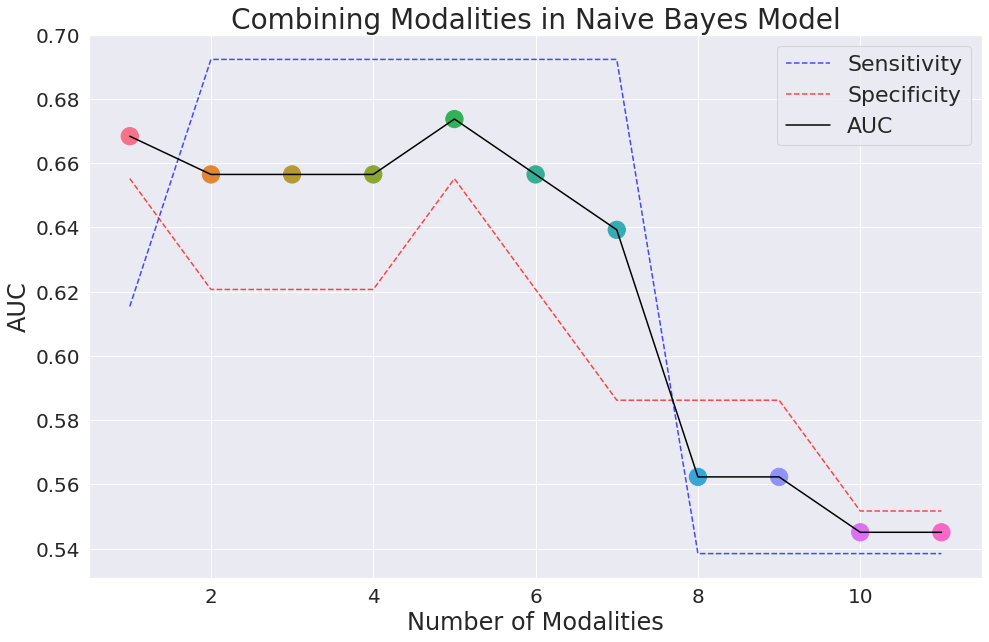

In [59]:
import seaborn as sns
c = sns.color_palette("husl", 11)
sns.set_theme()

fig, ax = plt.subplots(figsize=(16,10))

plt.plot(naiveBayesSaved['Sensitivity'], '--', c='blue', alpha=0.7 )
plt.plot(naiveBayesSaved['Specificity'], '--', c='red', alpha=0.7 )
plt.plot(naiveBayesSaved['AUC'], c='black')
plt.scatter(naiveBayesSaved.index, naiveBayesSaved['AUC'], s=300, c=c)

plt.legend(['Sensitivity', 'Specificity', 'AUC'], fontsize=22)
plt.title("Combining Modalities in Naive Bayes Model", fontsize=28)
plt.xlabel("Number of Modalities", fontsize=24)
plt.ylabel("AUC", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("NaiveBayes.png",bbox_inches="tight")

What I observe is that any model combined with t2-flair will produce a 72.2% AUC model

### Rank

In [193]:
import seaborn as sns

In [194]:
topX = 2

In [195]:
top_feat_dict = {}

for f in resd.keys():
    f_short = f.split("/")[-1]
    for i, pat_idx in enumerate(clinical.index.values):
        coefs = np.abs(coef[f_short][i])[0]
        a = lambda x: list(idx_dict[f_short][i])[x] # + includedFeats][0][x]
        ordered_coef_args = np.argsort(coefs)[::-1].tolist()
        topFeats =  [a(x) for x in ordered_coef_args][:topX] # get top features
        topVals = [np.abs(coefs[x]) for x in ordered_coef_args][:topX]
        for i_idx, k in enumerate(topFeats):
            top_feat_dict[str(k)] = top_feat_dict.get(str(k),0) + topVals[i_idx]*np.mean(resd[f][k]) #((topX - i_idx) / topX)
            
# change to freq)
tot = np.sum(list(top_feat_dict.values()))
for x in top_feat_dict.keys():
    top_feat_dict[x] = top_feat_dict[x] / tot

In [196]:
sortedIDX = np.argsort(list(top_feat_dict.values()))[::-1]
catl = [list(top_feat_dict.keys())[x] for x in sortedIDX[:30]]
cats= catl[:25]
cats.sort()
vals = [top_feat_dict[x] for x in cats]

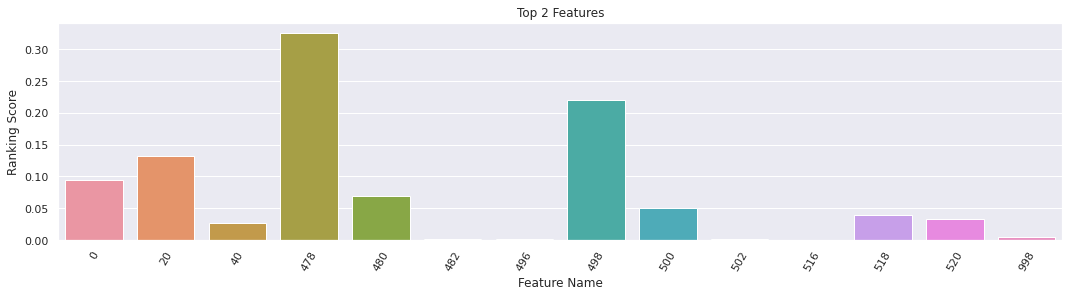

In [197]:
plt.subplots(figsize=(18,4))
sns.barplot(x=cats,y=vals)
plt.xticks(rotation=60)
plt.title("Top %s Features" % topX)
plt.xlabel("Feature Name")
plt.ylabel("Ranking Score")
plt.savefig("Fig2_new.png")

## Graph Mean Curve

In [272]:
f = list(resd)[12] # 12
f

'/nfs/turbo/umms-ukarvind/elisawa/1Pseudoprogression/UPenn-UMich Code Sharing/Data_Full42_2023/adc_flair/resd_adc_flair_200.RData'

In [273]:
sub0 = resd[f][labels['label'] == 0]
sub1 = resd[f][labels['label'] == 1]

Text(0.5, 1.0, 'Mean Densities for each Class')

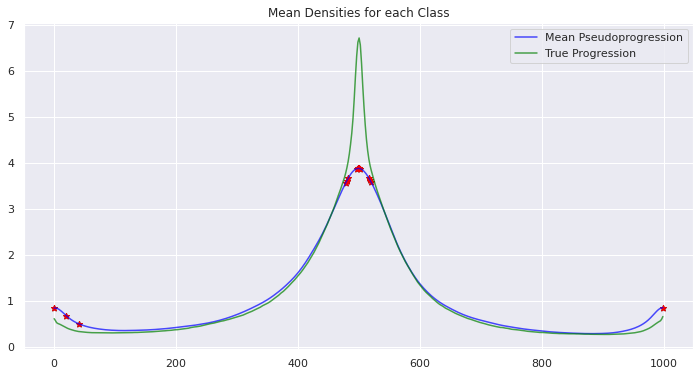

In [277]:
idx = [int(x) for x in catl if x not in includedFeats]

minval = 0
maxval = 1000

top_feats_idx = [int(x) for x in catl[:15] if x not in includedFeats]

plt.subplots(figsize=(12,6))
plt.plot(sub0.mean()[minval:maxval], color="blue", alpha=0.7)
plt.plot(sub1.mean()[minval:maxval],  color="green", alpha=0.7)
plt.scatter(idx, [sub0.mean()[x] for x in idx],marker='*', color='black')
plt.scatter(top_feats_idx, [sub0.mean()[x] for x in top_feats_idx], marker='*', color="red")
plt.legend(["Mean Pseudoprogression", "True Progression"])
plt.title("Mean Densities for each Class")

In [275]:
std = resd[f].std()
lower = resd[f].mean() - std
upper = resd[f].mean() + std

Text(0.5, 1.0, 'Mean Densities for each Class')

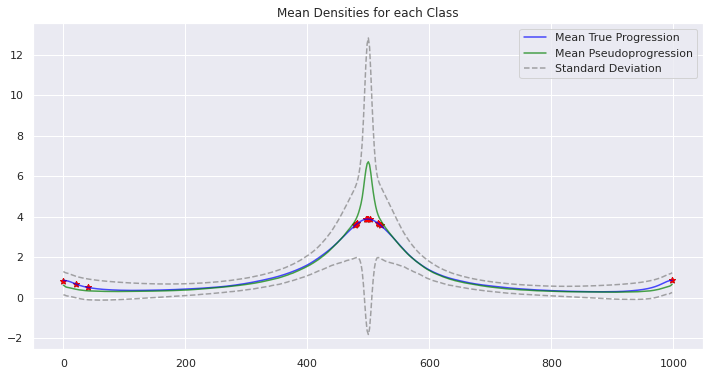

In [276]:
plt.subplots(figsize=(12,6))
plt.plot(sub0.mean()[minval:maxval], color="blue", alpha=0.7)
plt.plot(sub1.mean()[minval:maxval],  color="green", alpha=0.7)
plt.plot(np.arange(minval,maxval,2),lower[minval:maxval], '--', color="gray", alpha=0.7)
plt.plot(np.arange(minval,maxval,2),upper[minval:maxval], '--', color="gray", alpha=0.7)
plt.scatter(idx, [sub0.mean()[x] for x in idx],marker='*', color='black')
plt.scatter(top_feats_idx, [sub0.mean()[x] for x in top_feats_idx], marker='*', color="red")
plt.legend(["Mean True Progression", "Mean Pseudoprogression", "Standard Deviation"])
plt.title("Mean Densities for each Class")

# Use PCA

## LOOCV

In [200]:
from sklearn.metrics import roc_auc_score

In [201]:
includedFeats = [x for x in list(clinical) if x != "ID" and "Psuedo" not in x]

## Calculate results

Here, I'm redoing the calculation of importance because I need std cutoffs to be done for each fold for each criteria so the test data is not included as part of the calculations. Then, for all criteria and all folds, I will calculate the importance

We attempt to create an ensemble model to predict based off of density features.  In order to drop out density features which have not changed, we build a small ensemble model which cuts out features up to less than 1 pixel std. So we deem differences in 1 pixel to be possibly important

In [182]:
auc_list = []
coef = {}
idx_dict = {}
res = len(resd.iloc[0]) # resolution

predicted = np.zeros((res, len(resd.index.values))) # 100 rows, patno cols
#X2 = pd.merge(resd,clinical[includedFeats],left_index=True,right_index=True)

for i,patno in tqdm(enumerate(resd.index.values)):
    
    X_test1 = resd.loc[patno]
    X_test2 = clinical[includedFeats].loc[patno]
    y_test = clinical.loc[patno]['Psuedo']
    
    X_train1 = resd.drop(patno)
    X_train2 = clinical[includedFeats].drop(patno)
    y_train = clinical.drop(patno)['Psuedo']
    
    for j in range(1,res):
    
        idx = [x for x in range(j)]
        
        #X_train = pd.merge(X_train1[idx], X_train2, left_index=True, right_index=True)
        #X_test = X_test1[idx].append(X_test2)
        
        X_train = X_train1[idx]
        X_test = X_test1[idx]
        
        #print(X_train.shape)
        
        if j not in idx_dict:
            idx_dict[j] = {}
        idx_dict[j][i] = idx
    
        clf = LogisticRegression(max_iter=3000, class_weight="balanced") # 3000
        #clf = svm.SVC(class_weight="balanced", C=50)
        
        clf.fit(X_train, y_train)
        predicted[j-1][i] = predicted[j-1][i] + clf.predict(np.reshape(X_test.values,(1,-1))).astype('float64')[0] #[1]
        print(y_test, predicted[j-1][i])
        if j not in coef:
            coef[j] = {}
        coef[j][i] = clf.coef_

0it [00:00, ?it/s]

0 1.0
0 1.0
0 0.0
0 1.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
1 1.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.

# LOOCV

In [183]:
predicted

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [184]:
auc_list = []
for i in range(res):
    auc_list.append(roc_auc_score(clinical['Psuedo'], predicted[i,:]))

In [185]:
np.max(auc_list), np.argmax(auc_list)

(0.6510989010989011, 6)

In [203]:
%matplotlib inline

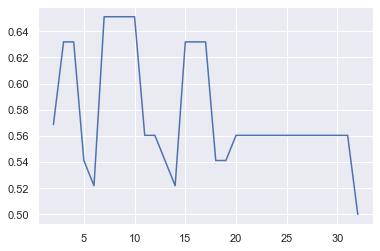

In [205]:
##### plt.title('Leave One Out CV')
plt.plot(range(2,len(auc_list)+1), auc_list[1:])
plt.savefig("Fig3.png")

In [188]:
import seaborn as sns
sns.set_theme(palette="Set2")

Text(0, 0.5, 'AUC')

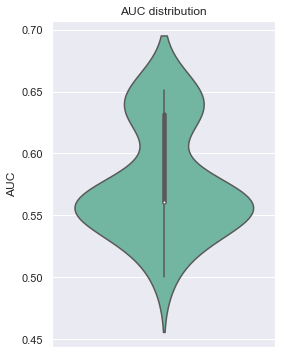

In [189]:
plt.subplots(figsize=(4,6))
sns.violinplot(y=auc_list[1:])
plt.title("AUC distribution")
plt.ylabel("AUC")

In [190]:
auc_list[3]

0.6318681318681318

In [191]:
# Mean of tests
np.mean(auc_list[1:])

0.5770116979794401

In [206]:
# std err of tests
np.std(auc_list[1:]) / np.sqrt(len(auc_list[1:]))

0.0077708932308352885

## TSNE

In [193]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000)
tsne_results = tsne.fit_transform(resd)

[t-SNE] Computing 32 nearest neighbors...
[t-SNE] Indexed 33 samples in 0.000s...
[t-SNE] Computed neighbors for 33 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 33 / 33
[t-SNE] Mean sigma: 16.410621
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.038826
[t-SNE] KL divergence after 1000 iterations: 0.247911


In [194]:
%matplotlib inline

In [195]:
tsne_results = pd.DataFrame(tsne_results)
tsne_results.index = resd.index.values

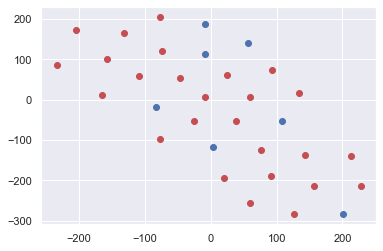

In [196]:
for patno in sub0.index:
    plt.scatter(tsne_results.loc[patno][0], tsne_results.loc[patno][1], c = 'r')
    # identify outliers
    #if resd.loc[patno][0] < -3:
    #    print(patno)

for patno in sub1.index:
    plt.scatter(tsne_results.loc[patno][0], tsne_results.loc[patno][1], c = 'b')

plt.show()

# Plot PCs

In [197]:
sub0 = clinical[clinical['Psuedo'] == 0]
sub1 = clinical[clinical['Psuedo'] == 1]

In [198]:
%matplotlib
import seaborn as sns
sns.set()

Using matplotlib backend: Qt5Agg


In [199]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

a = 0
angle = 80

for patno in sub0.index:
    ax.scatter(resd.loc[patno][a], resd.loc[patno][a+1], resd.loc[patno][a+2], c = 'r')
    # identify outliers
    #if resd.loc[patno][0] < -3:
    #    print(patno)

for patno in sub1.index:
    ax.scatter(resd.loc[patno][a], resd.loc[patno][a+1], resd.loc[patno][a+2], c = 'b')

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)


# Check variance of PCs over folds

In [1525]:
data = pyreadr.read_r("PC_var.RData")['PC_list']
data.shape

(35, 33)

Text(0, 0.5, '(Std of PCs over folds)/Mean')

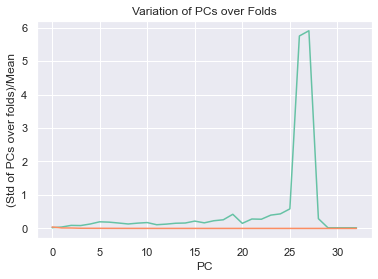

In [524]:
plt.plot(data.std() / data.mean())
plt.plot(data.std())
plt.title("Variation of PCs over Folds")
plt.xlabel("PC")
plt.ylabel("(Std of PCs over folds)/Mean")